In [1]:
from sympy import *

In [2]:
init_printing(use_latex='mathjax')

In [3]:
y = Function('y')

In [4]:
x = Symbol('x')

In [5]:
exp('2')

 2
ℯ 

In [6]:
equ=Eq(y(x).diff(x,x)-y(x),2*exp(-1*x)+10*cos(2*x))
equ

          2                            
         d                           -x
-y(x) + ───(y(x)) = 10⋅cos(2⋅x) + 2⋅ℯ  
          2                            
        dx                             

In [7]:
sol=dsolve(equ,y(x))
sol

           x             -x             
y(x) = C₂⋅ℯ  + (C₁ - x)⋅ℯ   - 2⋅cos(2⋅x)

In [8]:
C1,C2 = symbols('C1 C2') 

In [9]:
sols=sol.subs({C2:10,C1:10})
sols

                  -x       x             
y(x) = (-x + 10)⋅ℯ   + 10⋅ℯ  - 2⋅cos(2⋅x)

In [10]:
srepr(sol)

"Equality(Function('y')(Symbol('x')), Add(Mul(Symbol('C2'), exp(Symbol('x'))), Mul(Add(Symbol('C1'), Mul(Integer(-1), Symbol('x'))), exp(Mul(Integer(-1), Symbol('x')))), Mul(Integer(-1), Integer(2), cos(Mul(Integer(2), Symbol('x'))))))"

In [11]:
Add(Mul(Symbol('C2'), exp(Symbol('x'))), \
    Mul(Add(Symbol('C1'), Mul(Integer(-1), Symbol('x'))), exp(Mul(Integer(-1), Symbol('x')))))

    x             -x
C₂⋅ℯ  + (C₁ - x)⋅ℯ  

In [15]:
>>> def pre(expr):
...     print(expr)
...     for arg in expr.args:
...         pre(arg)

In [16]:
# sols.free_symbols,
pre(sols)

Eq(y(x), (-x + 10)*exp(-x) + 10*exp(x) - 2*cos(2*x))
y(x)
x
(-x + 10)*exp(-x) + 10*exp(x) - 2*cos(2*x)
-2*cos(2*x)
-2
cos(2*x)
2*x
2
x
10*exp(x)
10
exp(x)
x
(-x + 10)*exp(-x)
-x + 10
10
-x
-1
x
exp(-x)
-x
-1
x


In [17]:
sols.rhs.args

⎛                 x             -x⎞
⎝-2⋅cos(2⋅x), 10⋅ℯ , (-x + 10)⋅ℯ  ⎠

<IPython.core.display.Javascript object>


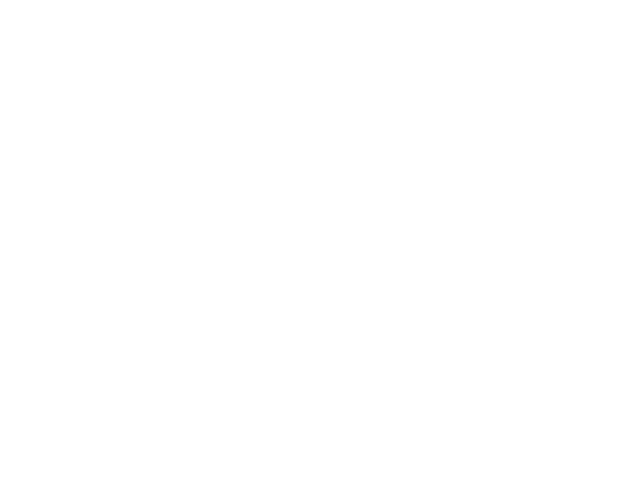

<IPython.core.display.Javascript object>


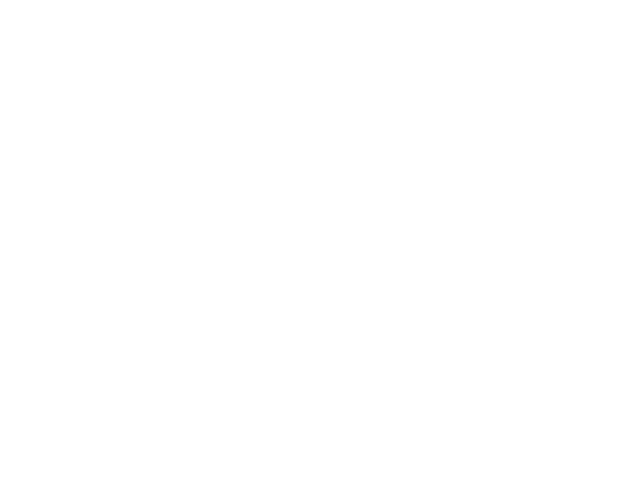

In [18]:
%matplotlib notebook
plot(sols.rhs.args[1],sols.rhs.args[2])
plot(sols.rhs.args[0])

<IPython.core.display.Javascript object>


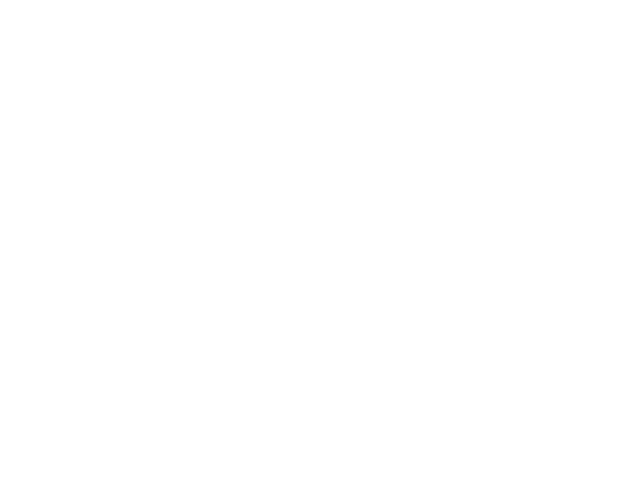

In [19]:
 plot(sols.rhs)

C:\Users\aron\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>


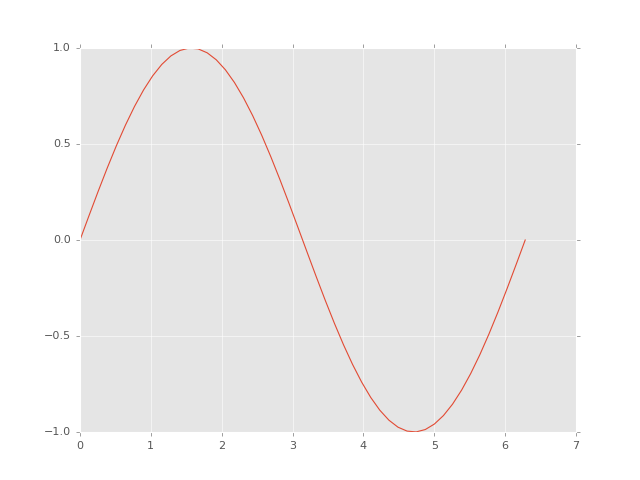

In [20]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')
import numpy as np


x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()
    plt.show()
interact(update);

In [94]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [95]:
def f(x):
    return x

In [96]:
interact(f, x=10);

30

/home/aron/anaconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>


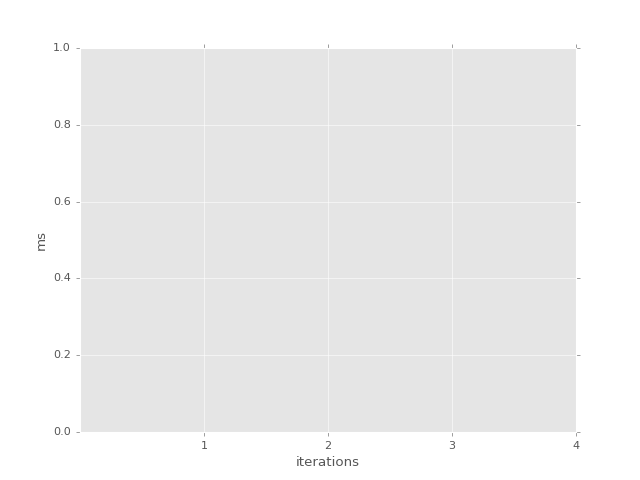

Domain gave error on pinging
Domain gave error on pinging


In [99]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print( "Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()